ML BANK

LOAD DATA   

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Resources/loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

DATA VISUALIZATION

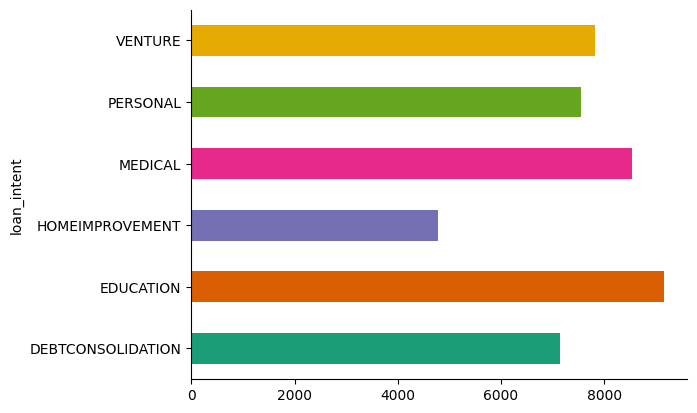

In [6]:
# @title loan_intent

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('loan_intent').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

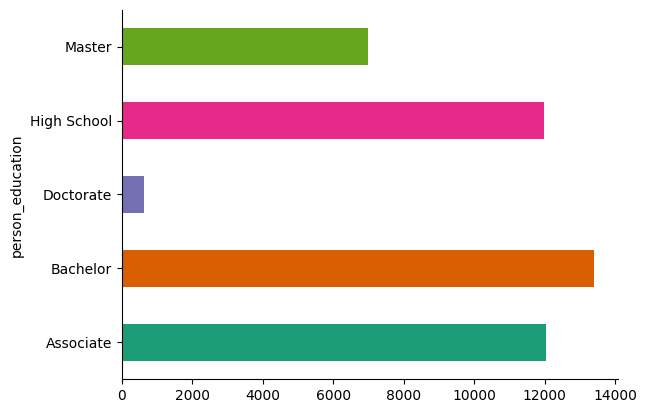

In [7]:
# @title person_education

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('person_education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

DATA PREPARATION

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

USE OneHotEncoder TO TRANSFORM CATEGORICAL COLUMNS THAT ARE NOMINAL

In [9]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder_categorical_features = encoder.fit_transform(df[['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']])
encoded_df = pd.DataFrame(encoder_categorical_features, columns=encoder.get_feature_names_out())

In [10]:
encoded_df.head()

,person_gender_female,person_gender_male,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


USE LABEL ENCODER TO TRANSFORM CATEGORICAL COLUMN THAT IS ORDINAL

In [11]:
label_encoder = LabelEncoder()
df['education_encoded'] = label_encoder.fit_transform(df['person_education'])
new_df = pd.concat([df, encoded_df], axis=1)

In [12]:
new_df.drop(['person_gender', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file', 'person_education'], axis=1, inplace=True)

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   person_age                          45000 non-null  float64
 1   person_income                       45000 non-null  float64
 2   person_emp_exp                      45000 non-null  int64  
 3   loan_amnt                           45000 non-null  float64
 4   loan_int_rate                       45000 non-null  float64
 5   loan_percent_income                 45000 non-null  float64
 6   cb_person_cred_hist_length          45000 non-null  float64
 7   credit_score                        45000 non-null  int64  
 8   loan_status                         45000 non-null  int64  
 9   education_encoded                   45000 non-null  int32  
 10  person_gender_female                45000 non-null  float64
 11  person_gender_male                  45000

PCA Analysis & Data Visualization

In [21]:
new_df.head()

super_new = new_df.copy()
super_new.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,education_encoded,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,0,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,1,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,1,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [22]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pca_scaled = StandardScaler().fit_transform(new_df[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']])

pca_scaled

array([[-0.95353824, -0.10408961, -0.89228413, ...,  4.01639414,
        -0.73910854, -1.41981408],
       [-1.11896309, -0.84600467, -0.89228413, ..., -0.6848294 ,
        -0.99686317, -2.5499748 ],
       [-0.45726369, -0.84406489, -0.3975175 , ...,  3.4430742 ,
        -0.73910854,  0.04741211],
       ...,
       [ 0.8661351 , -0.29068126,  0.26217134, ..., -1.02882137,
         1.06517387,  0.70171569],
       [ 0.2044357 , -0.58634807, -0.23259529, ...,  2.52576229,
         0.03415535, -0.5672367 ],
       [-0.62268854, -0.35699428, -0.72736192, ..., -0.11150946,
        -0.73910854, -0.09137955]])

In [23]:
df_pca_scaled = pd.DataFrame(pca_scaled, columns=['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'])

In [24]:
super_new.drop(['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score'], axis=1, inplace=True)


In [25]:

df_pca = pd.merge(df_pca_scaled, super_new, left_index=True, right_index=True)
df_pca.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,education_encoded,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,-0.953538,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,-1.419814,1,4,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-1.118963,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0,3,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.457264,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,0.047412,1,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.788113,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,0.840507,1,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.622689,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,-0.924130,1,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
pca=PCA(n_components=10)
customers_pca = pca.fit_transform(df_pca)
customers_pca[:5]


array([[-1.71358594,  2.05601393,  6.04273039,  0.65603911, -0.90766604,
         0.88934033,  0.40547751, -0.75481473,  0.27430262, -0.27572765],
       [-2.36950635,  1.12819365, -1.44688516, -0.25060897, -1.41339355,
         1.89946399, -0.17703358, -0.79175611, -0.13075518,  0.33223811],
       [-1.20823381,  1.15699497,  2.3574036 , -1.48290425, -0.38662997,
        -0.29874865,  0.4964409 , -0.73681019, -0.74824639,  2.46755301],
       [-1.23221338, -0.86712915,  5.57942089,  0.46374998,  0.59244555,
        -0.82927844,  0.10460807, -0.78185987,  0.51215241, -0.4224485 ],
       [-1.24550025,  2.07964124,  6.18743938,  0.45794593, -1.17380057,
         0.13551718,  0.35929208,  0.66215897,  0.39014791, -0.01574774]])

In [44]:
pca.explained_variance_ratio_

array([0.22570197, 0.17170161, 0.13362192, 0.09298228, 0.07802179,
       0.07470432, 0.03901192, 0.03880812, 0.03082453, 0.01802474])

In [ ]:
customers_pca_df = pd.DataFrame(customers_pca,columns=["PCA1", "PCA2","PCA3", "PCA4","PCA5","PCA6", "PCA7","PCA8", "PCA9","PCA10"])
customers_pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10
0,-1.713586,2.056014,6.042730,0.656039,-0.907666,0.889340,0.405478,-0.754815,0.274303,-0.275728
1,-2.369506,1.128194,-1.446885,-0.250609,-1.413394,1.899464,-0.177034,-0.791756,-0.130755,0.332238
2,-1.208234,1.156995,2.357404,-1.482904,-0.386630,-0.298749,0.496441,-0.736810,-0.748246,2.467553
3,-1.232213,-0.867129,5.579421,0.463750,0.592446,-0.829278,0.104608,-0.781860,0.512152,-0.422448
4,-1.245500,2.079641,6.187439,0.457946,-1.173801,0.135517,0.359292,0.662159,0.390148,-0.015748


In [45]:
inertia = []
k = list(range(1, 11))

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
    k_model.fit(customers_pca_df)
    inertia.append(k_model.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,517851.904857
1,2,438903.793275
2,3,363897.114527
3,4,334350.215724
4,5,317764.821038


NONLINEAR CODE BLOCKS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

def knn(letter_df):
    X = letter_df.drop('lettr', axis=1)
    y = letter_df['lettr']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    train_scores = []
    test_scores = []
    for k in range(1, 20, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        train_score = knn.score(X_train_scaled, y_train)
        test_score = knn.score(X_test_scaled, y_test)
        train_scores.append(train_score)
        test_scores.append(test_score)
    return print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

def randomforest(letter_df):
    X = letter_df.drop('lettr', axis=1)
    y = letter_df["lettr"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
    model = RandomForestClassifier(n_estimators=128,random_state=78)
    model = model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test,predictions)
    return print(f"Accuracy Score : {acc_score}")

def extratrees(letter_df):
    X = letter_df.drop('lettr', axis=1)
    y = letter_df['lettr']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = ExtraTreesClassifier(random_state=1).fit(X_train_scaled, y_train)
    #print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
    return print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
    
def gradientboost(letter_df):
    X = letter_df.drop('lettr', axis=1)
    y = letter_df['lettr']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    clf = GradientBoostingClassifier(random_state=1).fit(X_train_scaled, y_train)
    return print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

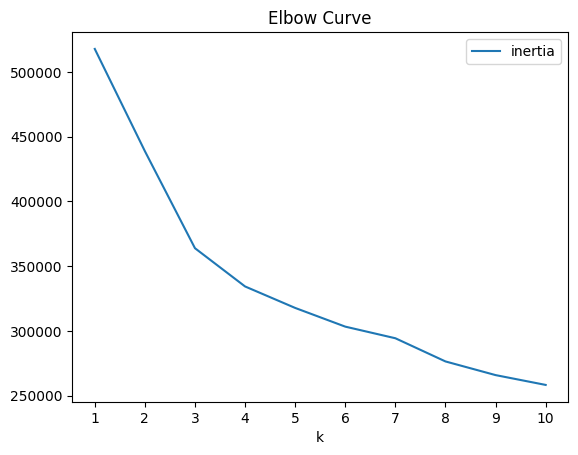

In [46]:
df_elbow.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k
)

In [47]:
model = KMeans(n_clusters=4, n_init='auto', random_state=0)
model.fit(customers_pca_df)
k_3 = model.predict(customers_pca_df)
customer_pca_predictions_df = customers_pca_df.copy()
customer_pca_predictions_df["customer_segments"] = k_3

<Axes: xlabel='PCA1', ylabel='PCA2'>

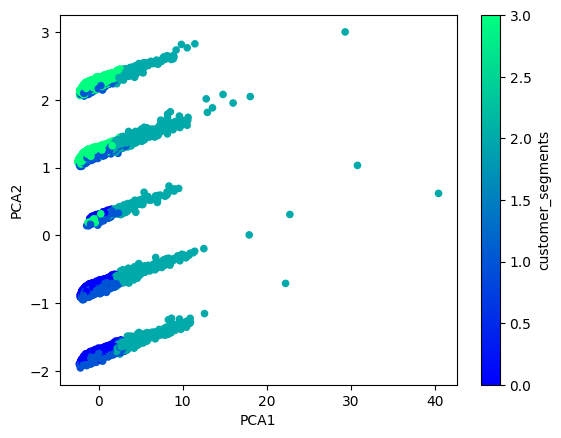

In [48]:
customer_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='winter')

In [58]:
model_k2 = KMeans(n_clusters=2, n_init='auto')
model_k2.fit(df_pca)

KMeans(n_clusters=2)

In [59]:
customer_segments_k2 = model_k2.predict(df_pca)
print(customer_segments_k2)

[1 1 1 ... 0 0 1]


In [60]:
customer_predictions = df_pca.copy()
customer_predictions["Customer Segment (k=2)"] = customer_segments_k2
customer_predictions.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,education_encoded,...,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,Customer Segment (k=2)
0,-0.953538,-0.104090,-0.892284,4.024953,1.683039,4.016394,-0.739109,-1.419814,1,4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,-1.118963,-0.846005,-0.892284,-1.359209,0.044782,-0.684829,-0.996863,-2.549975,0,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-0.457264,-0.844065,-0.397517,-0.646600,0.625557,3.443074,-0.739109,0.047412,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
3,-0.788113,-0.007039,-0.892284,4.024953,1.417829,3.443074,-0.996863,0.840507,1,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,-0.622689,-0.176371,-0.727362,4.024953,1.095549,4.475050,-0.481354,-0.924130,1,4,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


<Axes: title={'center': 'k=2'}, xlabel='loan_percent_income', ylabel='loan_status'>

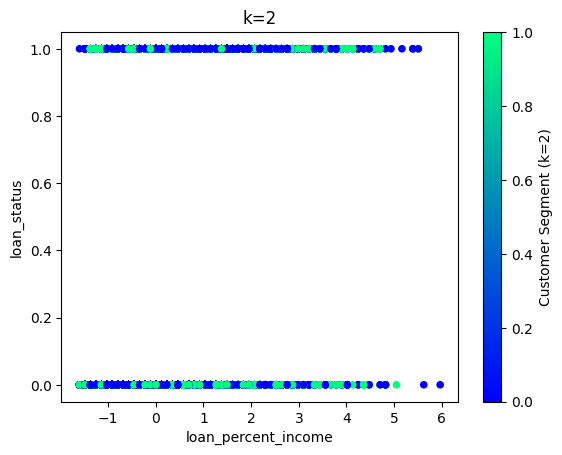

In [63]:
customer_predictions.plot.scatter(
    x="loan_percent_income", 
    y="loan_status", 
    c="Customer Segment (k=2)",
    title = "k=2",
    colormap='winter'
)

SEPARATE X AND Y DATA

In [ ]:
y = new_df['loan_status']
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [ ]:
X = new_df.drop('loan_status', axis=1)
X

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,education_encoded,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,4,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,3,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,3,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,1,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,4,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,1,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


PERFORM TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
X_train

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,education_encoded,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
22509,34.0,43400.0,10,7200.0,14.84,0.17,10.0,654,3,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
20076,30.0,21005.0,10,4000.0,14.22,0.19,7.0,607,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8901,23.0,56537.0,2,8000.0,10.65,0.14,4.0,681,4,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
24694,29.0,90873.0,5,12000.0,7.51,0.13,5.0,649,0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
16117,23.0,26896.0,1,6000.0,14.42,0.22,2.0,632,1,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,23.0,24977.0,1,5950.0,13.49,0.24,3.0,538,3,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
79,24.0,100332.0,1,28000.0,15.99,0.28,4.0,634,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
12119,24.0,97123.0,2,18000.0,7.90,0.19,2.0,683,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
14147,23.0,120911.0,0,7000.0,8.59,0.06,3.0,539,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
X_test

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,education_encoded,person_gender_female,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
38507,26.0,53735.0,3,4500.0,6.57,0.08,3.0,660,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
42743,28.0,37096.0,8,14800.0,11.14,0.40,7.0,686,3,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
13105,23.0,106467.0,1,10000.0,7.51,0.09,2.0,645,3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
24431,28.0,63685.0,2,10000.0,12.69,0.16,7.0,673,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2181,23.0,62148.0,0,13500.0,12.23,0.22,2.0,692,4,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31784,43.0,170084.0,21,15000.0,12.53,0.09,16.0,688,4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
11671,25.0,91137.0,4,5600.0,10.62,0.06,2.0,657,3,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
30368,42.0,63584.0,19,21000.0,10.38,0.33,13.0,674,0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
35260,29.0,162898.0,3,11000.0,9.79,0.07,8.0,704,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
